In [1]:
import numpy as np 
from recoMRD import recoMRD
import matplotlib.pyplot as plt


In [2]:
filename = './../example_data/meas_MID00159_FID03019_localizer_2D_iPAT2_interleaved.mrd'
mrd = recoMRD(filename)

mrd.img = mrd.kspace_to_image(mrd.kspace['image_scan'])
print(mrd.img.shape)
img_sos = mrd.remove_oversampling(mrd.img)
print(mrd.img.shape)
img_sos = mrd.coil_combination(img_sos, method='sos')

MRD file has more than one group. The last group will be imported.
Existing scans: acs, noise, image_scan


Filling image_scan: 100%|██████████| 768/768 [00:00<00:00, 2923.91it/s]


Reorder slice... Done.


Fourier transform: 100%|██████████| 44/44 [00:01<00:00, 42.50it/s]

(44, 384, 192, 1, 8, 1, 1, 1, 1, 1, 1)
Remove oversampling... Done.
(44, 384, 192, 1, 8, 1, 1, 1, 1, 1, 1)


(192, 192, 8)


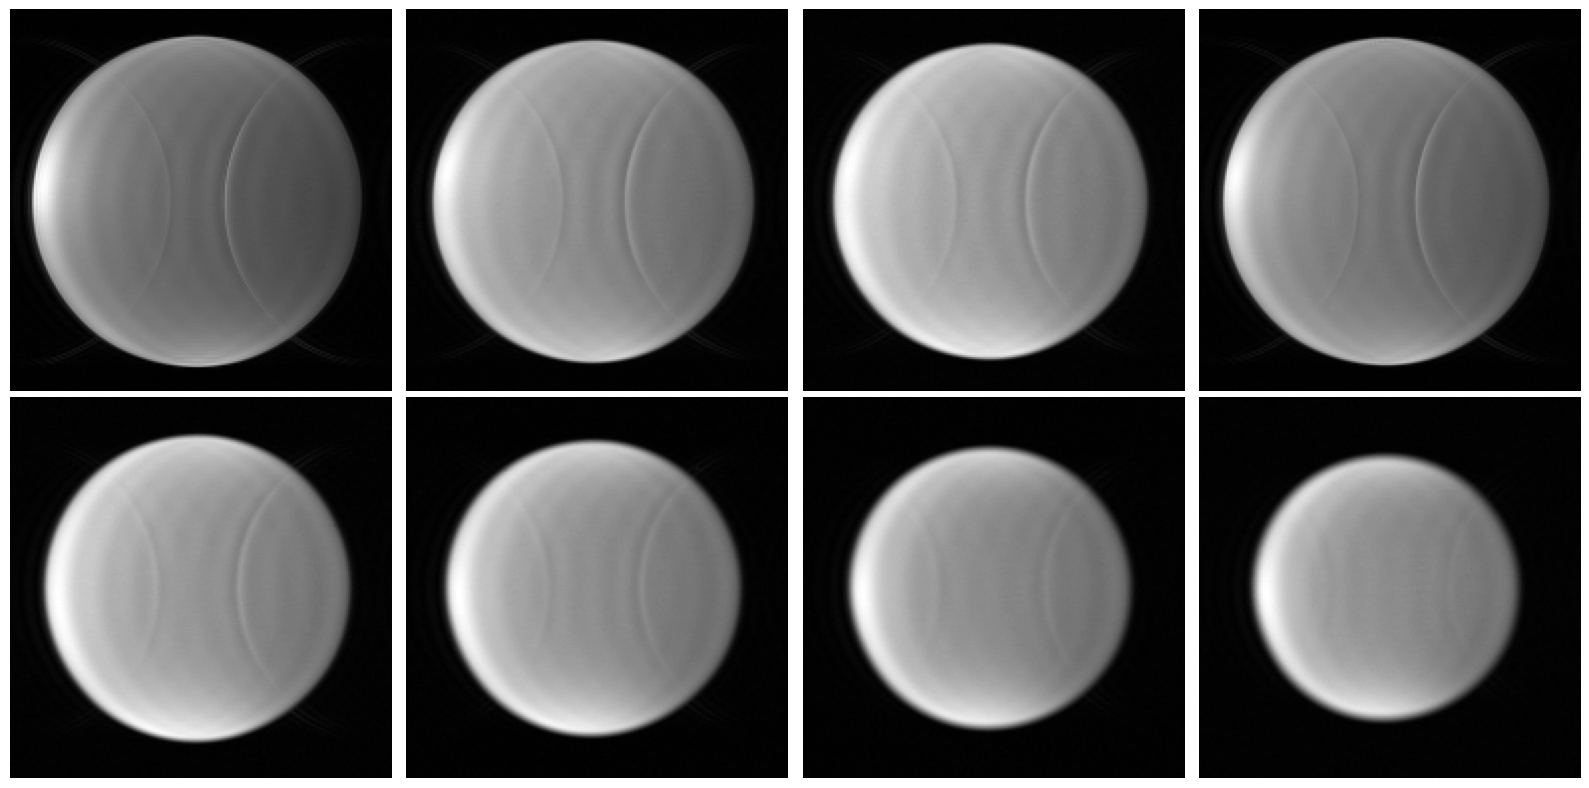

In [3]:
print(img_sos.squeeze().shape)
temp = img_sos.squeeze()
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i in range(2):
    for ax, index in zip(axes[i], range(4)):
        ax.imshow(np.abs(temp[...,i*4+index]),cmap='gray')
        ax.set_axis_off()
plt.tight_layout()  

In [4]:
print(mrd.kspace['acs'].shape)
print(mrd.kspace['acs'][::12,...].squeeze().shape)

(44, 384, 192, 1, 8, 1, 1, 1, 1, 1, 1)
(4, 384, 192, 8)


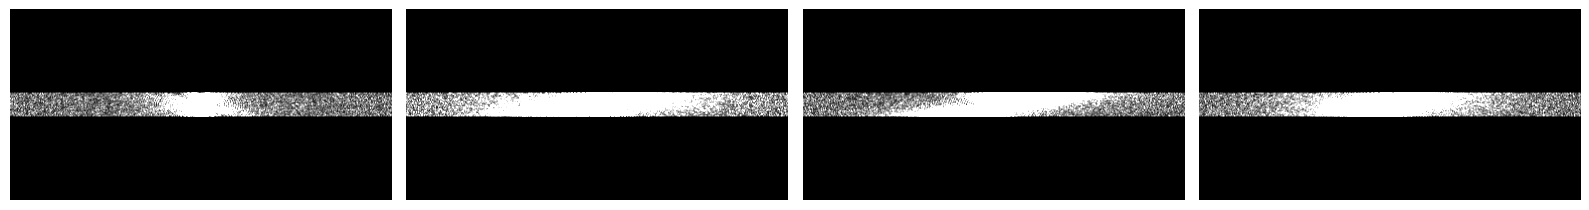

In [5]:
temp = mrd.kspace['acs'][::12,...].squeeze()
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
    axes[i].imshow(np.abs(temp[i,...,0]).T,cmap='gray', vmax=1e-5)
    axes[i].set_axis_off()
plt.tight_layout() 

Fourier transform: 100%|██████████| 44/44 [00:00<00:00, 47.95it/s]


Remove oversampling... Done.


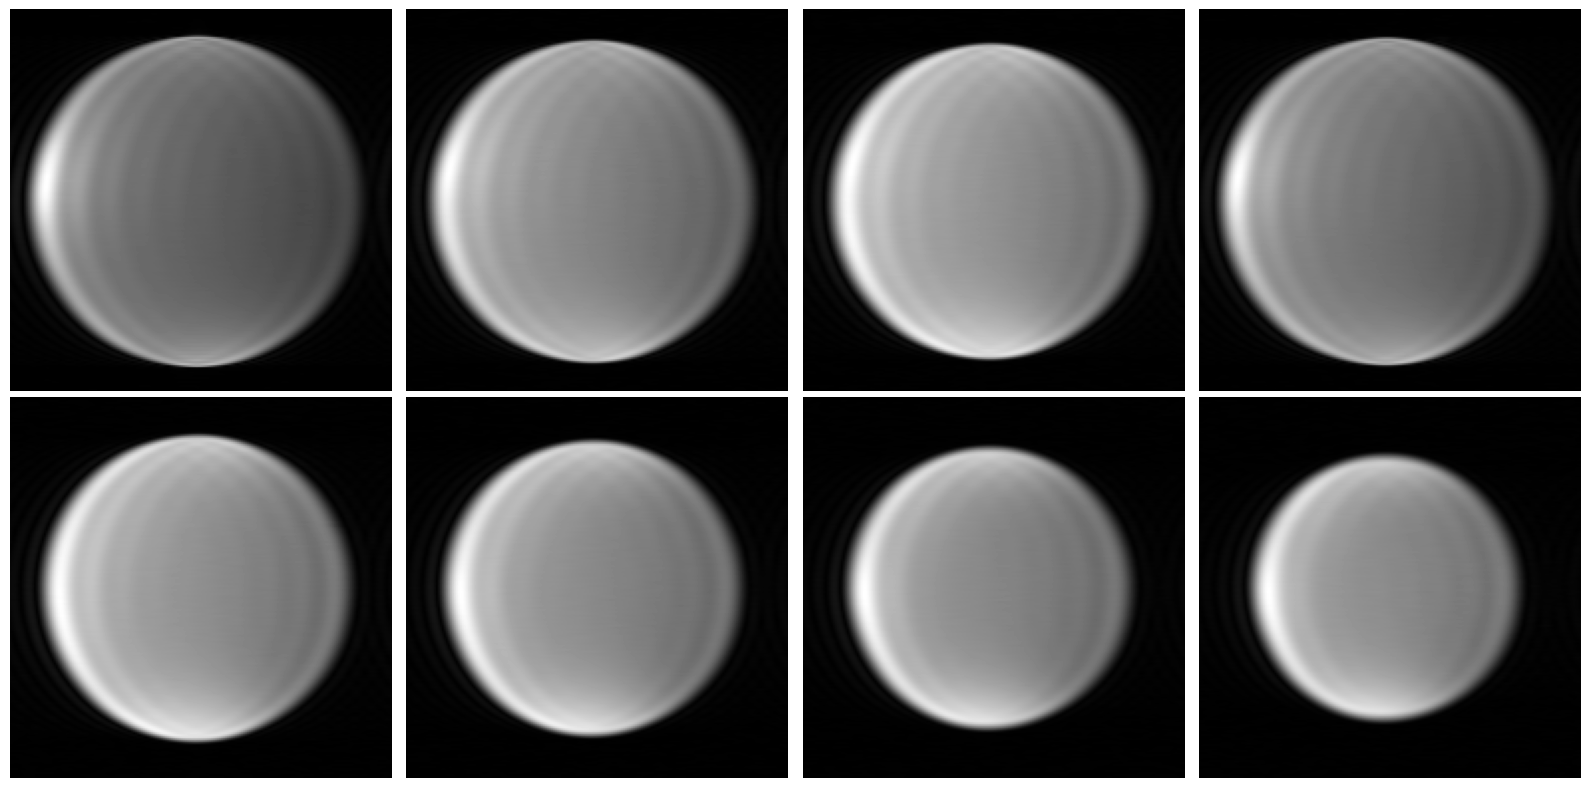

In [6]:
acs_img = mrd.kspace_to_image(mrd.kspace['acs'])
acs_img = mrd.remove_oversampling(acs_img)
acs_img = mrd.coil_combination(acs_img, method='sos')

temp = acs_img.squeeze()
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i in range(2):
    for ax, index in zip(axes[i], range(4)):
        ax.imshow(np.abs(temp[...,i*4+index]),cmap='gray')
        ax.set_axis_off()
plt.tight_layout() 


In [7]:
%%time
coils_sensitivity = mrd.calc_coil_sensitivity(mrd.kspace['acs'], method='espirit')
print(coils_sensitivity.shape)

(384, 192, 1, 44)
Done.
(384, 192, 1, 44)
Done.
(384, 192, 1, 44)
Done.
(384, 192, 1, 44)
Done.
(384, 192, 1, 44)
Done.
(384, 192, 1, 44)
Done.
(384, 192, 1, 44)
Done.
(384, 192, 1, 44)
Done.
(44, 384, 192, 1, 8)
CPU times: user 165 ms, sys: 277 ms, total: 442 ms
Wall time: 16.3 s


In [8]:
# %%time
# acs_img = mrd.kspace_to_image(mrd.kspace['acs'])
# acs_img = mrd.remove_oversampling(acs_img)
# acs_img = mrd.image_to_kspace(acs_img)
# coils_sensitivity = mrd.calc_coil_sensitivity(acs_img, method='espirit')
# print(coils_sensitivity.shape)

In [9]:
# %%time
# coils_sensitivity = mrd.calc_coil_sensitivity(mrd.kspace['acs'], method='caldir')
# print(coils_sensitivity.shape)

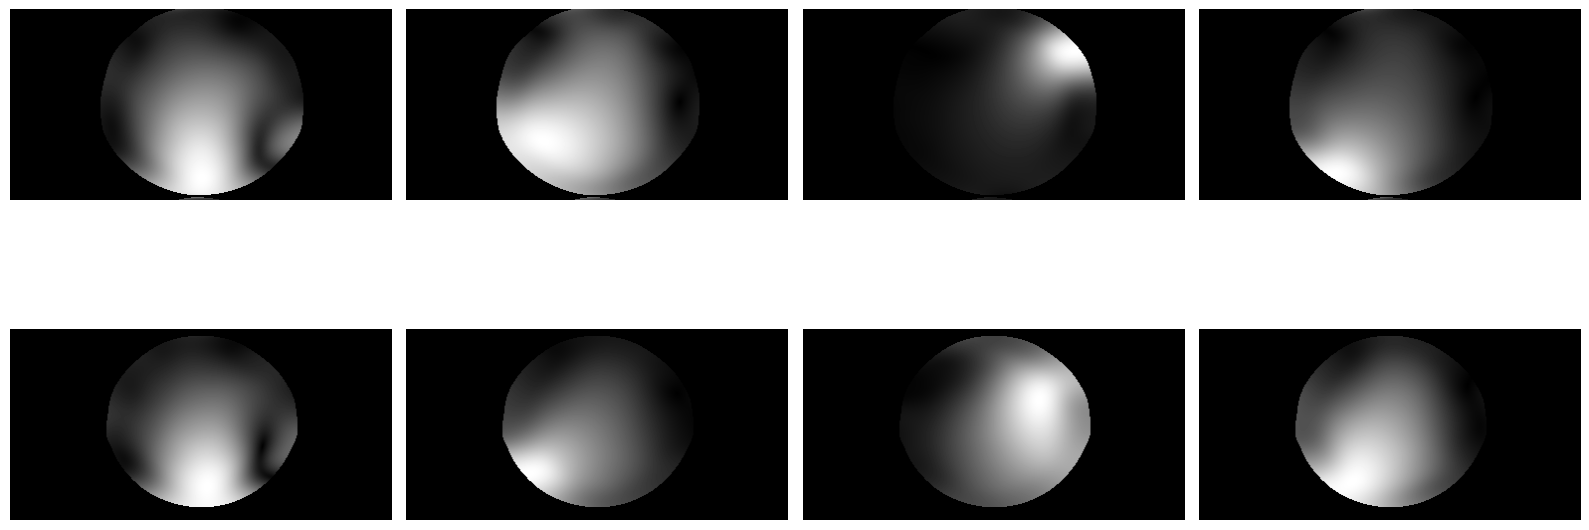

In [10]:
temp = coils_sensitivity[::12,...,::5].squeeze()
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i in range(2):
    for ax, index in zip(axes[i], range(4)):
        ax.imshow(np.abs(temp[index,...,i].T),cmap='gray')
        ax.set_axis_off()
plt.tight_layout() 

Remove oversampling... Done.


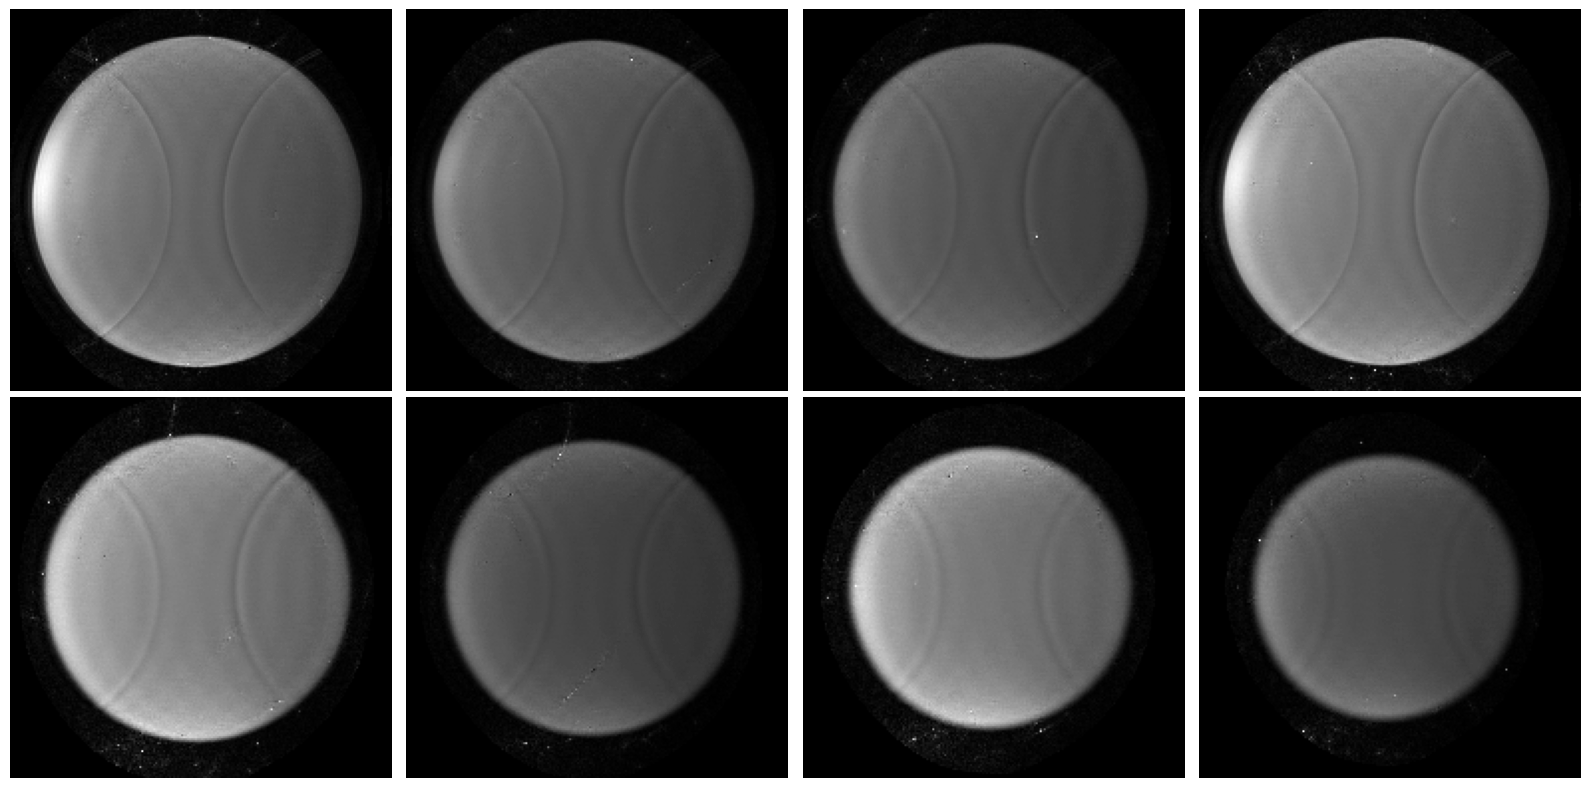

In [11]:
volume_comb = mrd.coil_combination(mrd.img, method='adaptive', coil_sens=coils_sensitivity)
volume_comb = mrd.remove_oversampling(volume_comb)

temp = volume_comb.squeeze()
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i in range(2):
    for ax, index in zip(axes[i], range(4)):
        ax.imshow(np.abs(temp[:,:,i*4+index]),cmap='gray')
        ax.set_axis_off()
plt.tight_layout() 

In [12]:

volume_comb = mrd.coil_combination(mrd.kspace['image_scan'], method='espirit', coil_sens=coils_sensitivity)
print(volume_comb.shape)

Size: 73728 Samples: 41472 Acc: 1.78
l2 regularization: 0.000100
Regularization terms: 1, Supporting variables: 0
conjugate gradients
Total Time: 1.008947
Size: 73728 Samples: 41472 Acc: 1.78
l2 regularization: 0.000100
Regularization terms: 1, Supporting variables: 0
conjugate gradients
Total Time: 0.923534
Size: 73728 Samples: 41472 Acc: 1.78
l2 regularization: 0.000100
Regularization terms: 1, Supporting variables: 0
conjugate gradients
Total Time: 0.960139
Size: 73728 Samples: 41472 Acc: 1.78
l2 regularization: 0.000100
Regularization terms: 1, Supporting variables: 0
conjugate gradients
Total Time: 1.078421
Size: 73728 Samples: 41472 Acc: 1.78
l2 regularization: 0.000100
Regularization terms: 1, Supporting variables: 0
conjugate gradients
Total Time: 1.044112
Size: 73728 Samples: 41472 Acc: 1.78
l2 regularization: 0.000100
Regularization terms: 1, Supporting variables: 0
conjugate gradients
Total Time: 1.183181
Size: 73728 Samples: 41472 Acc: 1.78
l2 regularization: 0.000100
Regul

Remove oversampling... Done.


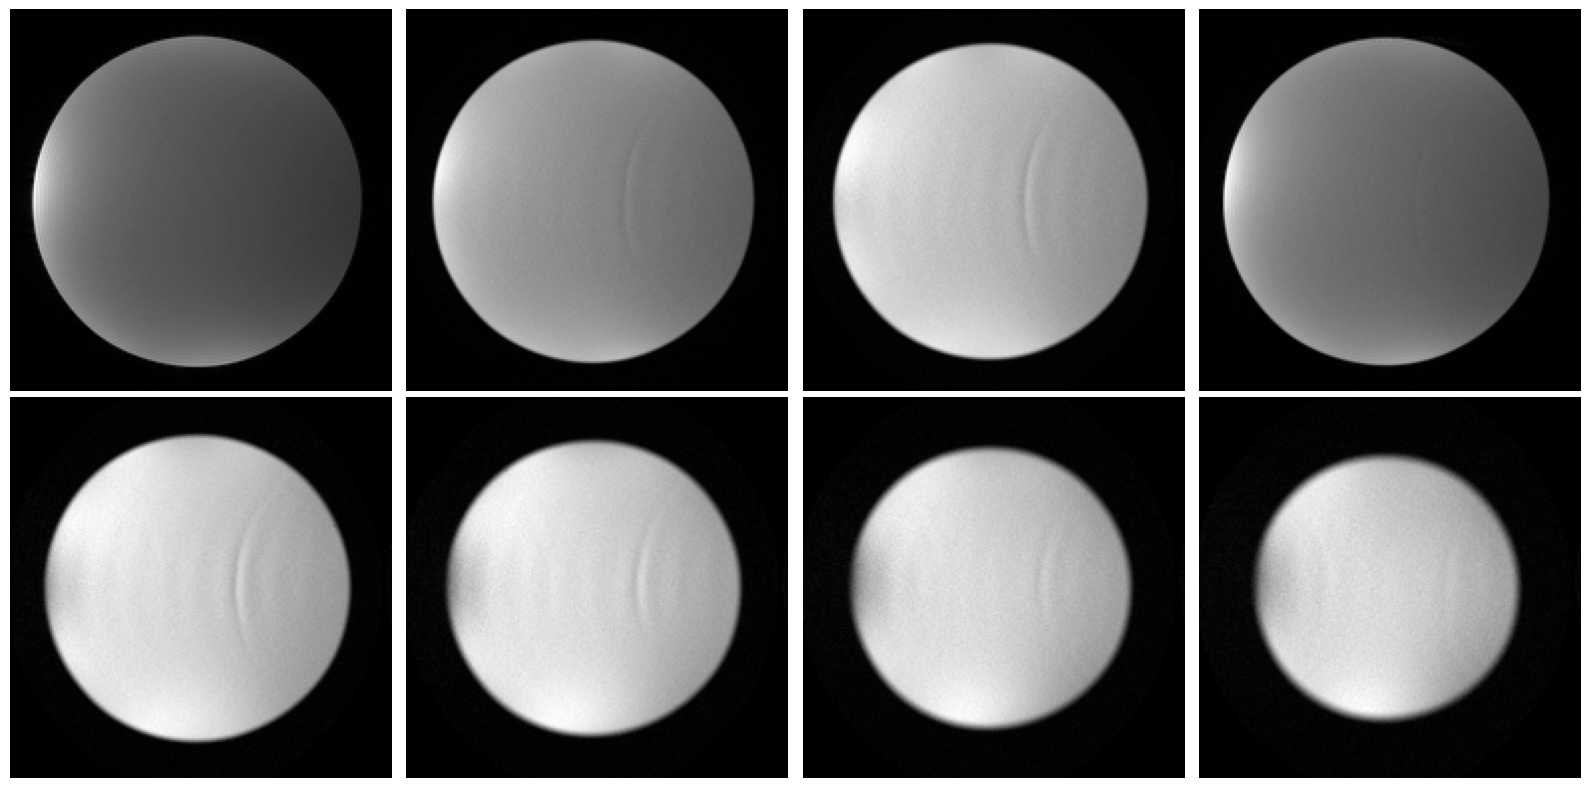

In [14]:
volume_comb = mrd.remove_oversampling(volume_comb)
temp = volume_comb.squeeze()
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i in range(2):
    for ax, index in zip(axes[i], range(4)):
        ax.imshow(np.abs(temp[:,:,i*4+index]),cmap='gray')
        ax.set_axis_off()
plt.tight_layout() 